# Business Understanding 
- Forecasting transaction 
- Likley reg cuz cont prediction
- Data for 3 years 
- Data quality is okay

# Data Understanding 

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('regression.csv')
df

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328
...,...,...,...,...,...,...,...
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680


In [191]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [193]:
# Assuming df is your DataFrame
for col in df.columns:
    print(col,len(df[col].unique()),df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [194]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [195]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


# Visualize Data 

In [196]:
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


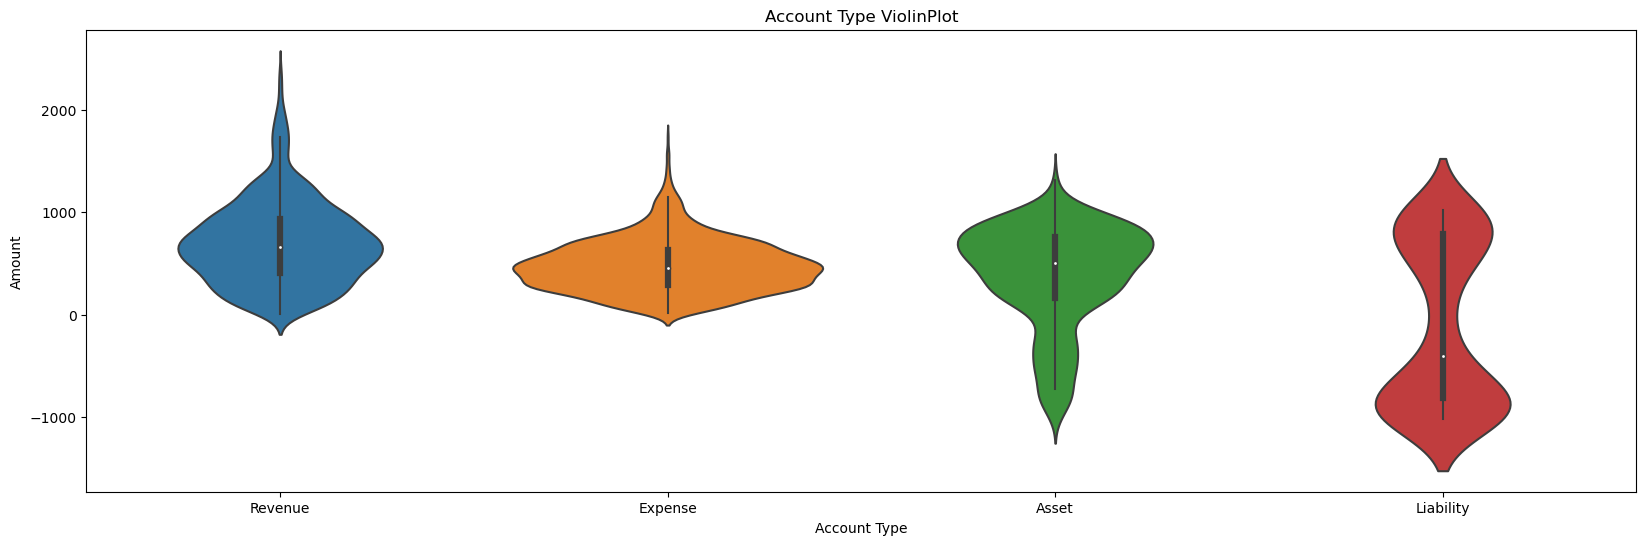

In [197]:
plt.figure(figsize=(20,6)) #spread of our cols
sns.violinplot(x='Account Type',y='Amount',data=df).set_title('Account Type ViolinPlot');

C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


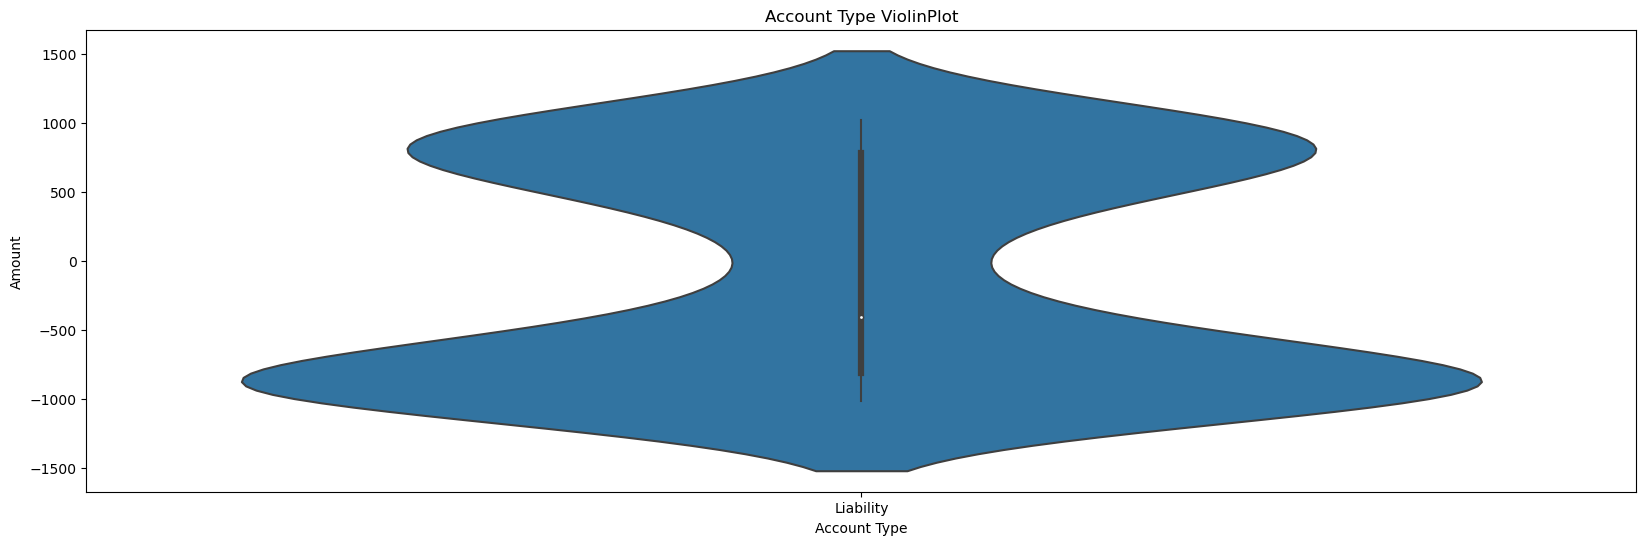

In [198]:
plt.figure(figsize=(20,6)) #spread of our cols'Revenue' 'Expense' 'Asset' 'Liability'
sns.violinplot(x='Account Type',y='Amount',data=df[df['Account Type']=='Liability']).set_title('Account Type ViolinPlot');

C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


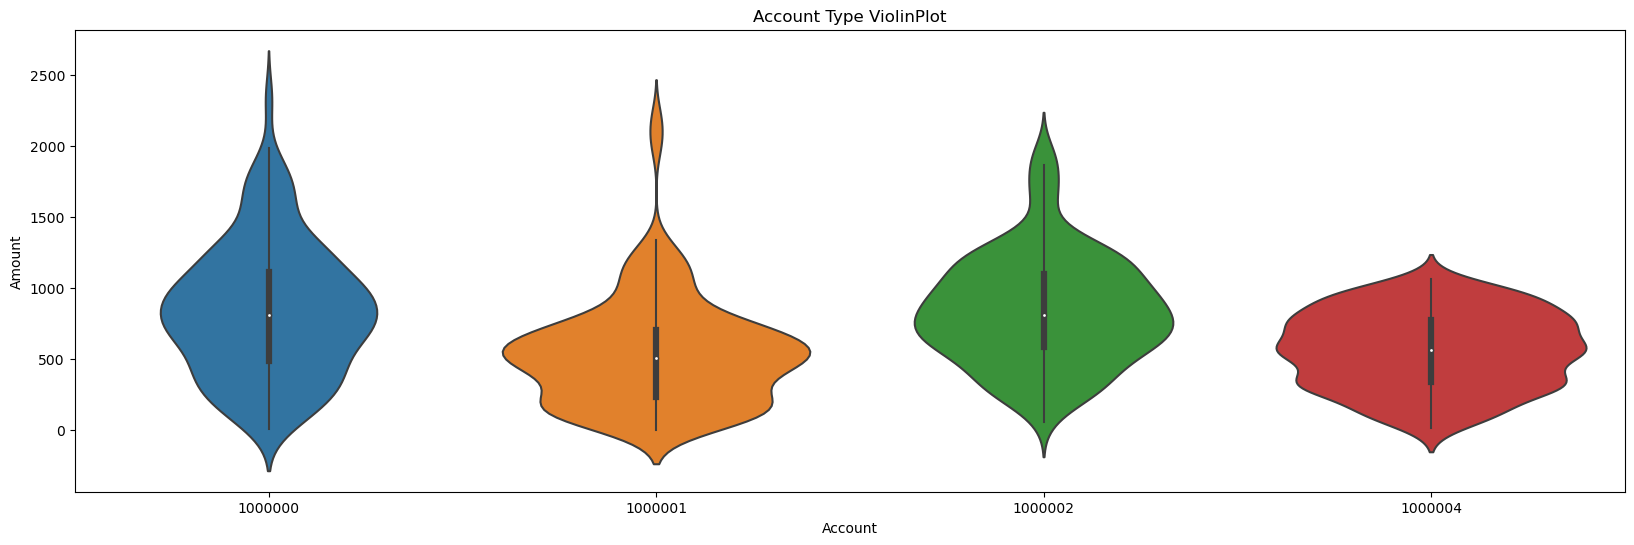

In [199]:
plt.figure(figsize=(20,6)) #spread of our cols'Revenue' 'Expense' 'Asset' 'Liability'
sns.violinplot(x='Account',y='Amount',data=df[df['Account Type']=='Revenue']).set_title('Account Type ViolinPlot');


In [200]:
monthmap={
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12  
}

In [201]:
df['Period']=df['Month'].apply(lambda x:monthmap[x])
df

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1
...,...,...,...,...,...,...,...,...
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121,12
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056,12
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478,12
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680,12


In [202]:
df[df['Month']=='Dec'].head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period
1287,2019,Dec,CC100,1000000,Product Sales,Revenue,1255.978,12
1288,2019,Dec,CC100,1000001,Licensing Revenue,Revenue,712.648,12
1289,2019,Dec,CC100,1000002,Service Revenue,Revenue,974.388,12
1290,2019,Dec,CC100,1000004,Fee Revenue,Revenue,431.811,12
1291,2019,Dec,CC100,2000000,Cost of Good Sold,Expense,832.194,12


In [203]:
df['Day'] =1

In [204]:
df['Date']=df['Year'].astype(str)+'-'+df['Period'].astype(str)+'-'+df['Day'].astype(str)

In [205]:
df

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-1-1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-1-1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-1-1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-1-1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-1-1
...,...,...,...,...,...,...,...,...,...,...
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121,12,1,2021-12-1
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056,12,1,2021-12-1
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478,12,1,2021-12-1
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680,12,1,2021-12-1


In [206]:
df['Date'].dtype

dtype('O')

In [207]:
df['Date']=pd.to_datetime(df['Date'])

In [208]:
df['Date'].dtype

dtype('<M8[ns]')

In [209]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

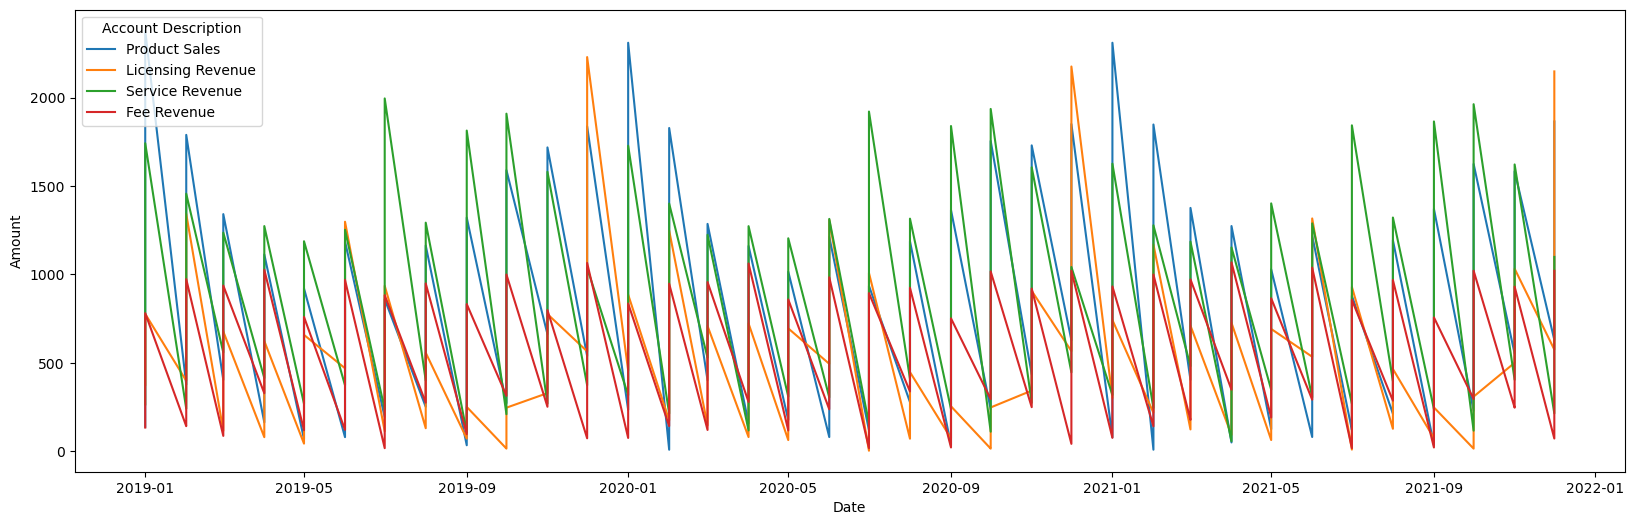

In [210]:
plt.figure(figsize=(20,6))
sns.lineplot(x='Date',y='Amount',hue='Account Description',estimator=None,data=df[df['Account Type']=='Revenue']);

# Correlation

In [211]:
df_c=df.drop(['Month','Cost Centre','Account Type','Account Description'],axis=1)
df_c.corr()

,Year,Account,Amount,Period,Day,Date
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN,9.432238e-01
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN,2.837451e-16
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN,2.214532e-02
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN,3.321515e-01
Day,NaN,NaN,NaN,NaN,NaN,NaN
Date,9.432238e-01,2.837451e-16,0.022145,3.321515e-01,NaN,1.000000e+00


create df contail each account and the amount of it 

In [213]:
corrdict ={}
for key,row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}

In [214]:
corrdf=pd.DataFrame.from_dict(corrdict)

In [215]:
corrdf

,0,1,2,3,4,5,6,7,8,9,...,4202,4203,4204,4205,4206,4207,4208,4209,4210,4211
1000000,1344.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000001,NaN,480.968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000002,NaN,NaN,650.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000004,NaN,NaN,NaN,339.36,NaN,NaN,NaN,NaN,NaN,NaN,...,1020.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000000,NaN,NaN,NaN,NaN,1125.328,NaN,NaN,NaN,NaN,NaN,...,NaN,680.683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000001,NaN,NaN,NaN,NaN,NaN,412.088,NaN,NaN,NaN,NaN,...,NaN,NaN,701.367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000002,NaN,NaN,NaN,NaN,NaN,NaN,259.488,NaN,NaN,NaN,...,NaN,NaN,NaN,427.631,NaN,NaN,NaN,NaN,NaN,NaN
2000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.697,NaN,NaN,...,NaN,NaN,NaN,NaN,540.06,NaN,NaN,NaN,NaN,NaN
2000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1105.277,NaN,...,NaN,NaN,NaN,NaN,NaN,698.121,NaN,NaN,NaN,NaN
3000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476.713,...,NaN,NaN,NaN,NaN,NaN,NaN,-282.056,NaN,NaN,NaN


In [216]:
corrdf=pd.DataFrame.from_dict(corrdict).T.fillna(0)

In [217]:
corrdf

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1344.051,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
1,0.000,480.968,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
2,0.000,0.000,650.82,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
3,0.000,0.000,0.00,339.36,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
4,0.000,0.000,0.00,0.00,1125.328,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,698.121,0.000,0.000,0.00,0.0
4208,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,-282.056,0.000,0.00,0.0
4209,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,537.478,0.00,0.0
4210,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,1152.68,0.0


In [218]:
corrdf.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


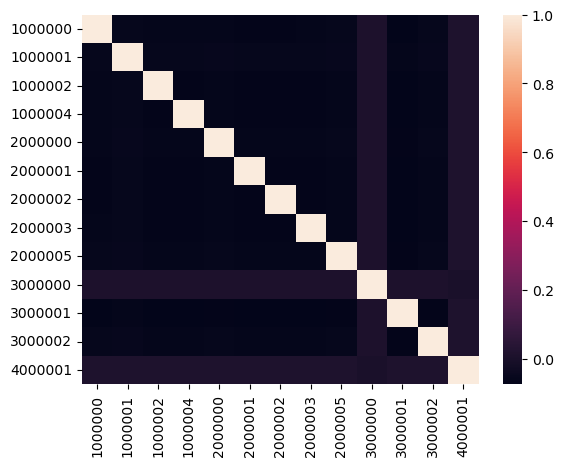

In [219]:
sns.heatmap(corrdf.corr());

In [220]:
df[df['Account']==3000000] #strong correlation 

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,Jan,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,Jan,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,Jan,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,Jan,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,Jan,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,Dec,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,Dec,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,Dec,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,Dec,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01


In [221]:
df[df['Account']==4000001]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
12,2019,Jan,CC100,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
25,2019,Jan,CC101,4000001,Accounts Payable,Liability,200.0,1,1,2019-01-01
38,2019,Jan,CC102,4000001,Accounts Payable,Liability,-980.0,1,1,2019-01-01
51,2019,Jan,CC200,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
64,2019,Jan,CC201,4000001,Accounts Payable,Liability,784.0,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4159,2021,Dec,CC201,4000001,Accounts Payable,Liability,804.0,12,1,2021-12-01
4172,2021,Dec,CC202,4000001,Accounts Payable,Liability,-1018.0,12,1,2021-12-01
4185,2021,Dec,CC300,4000001,Accounts Payable,Liability,-1020.0,12,1,2021-12-01
4198,2021,Dec,CC301,4000001,Accounts Payable,Liability,-612.0,12,1,2021-12-01


# Data Preparation 

In [222]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001], dtype=int64)

In [223]:
import numpy as np 

C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\yluja\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

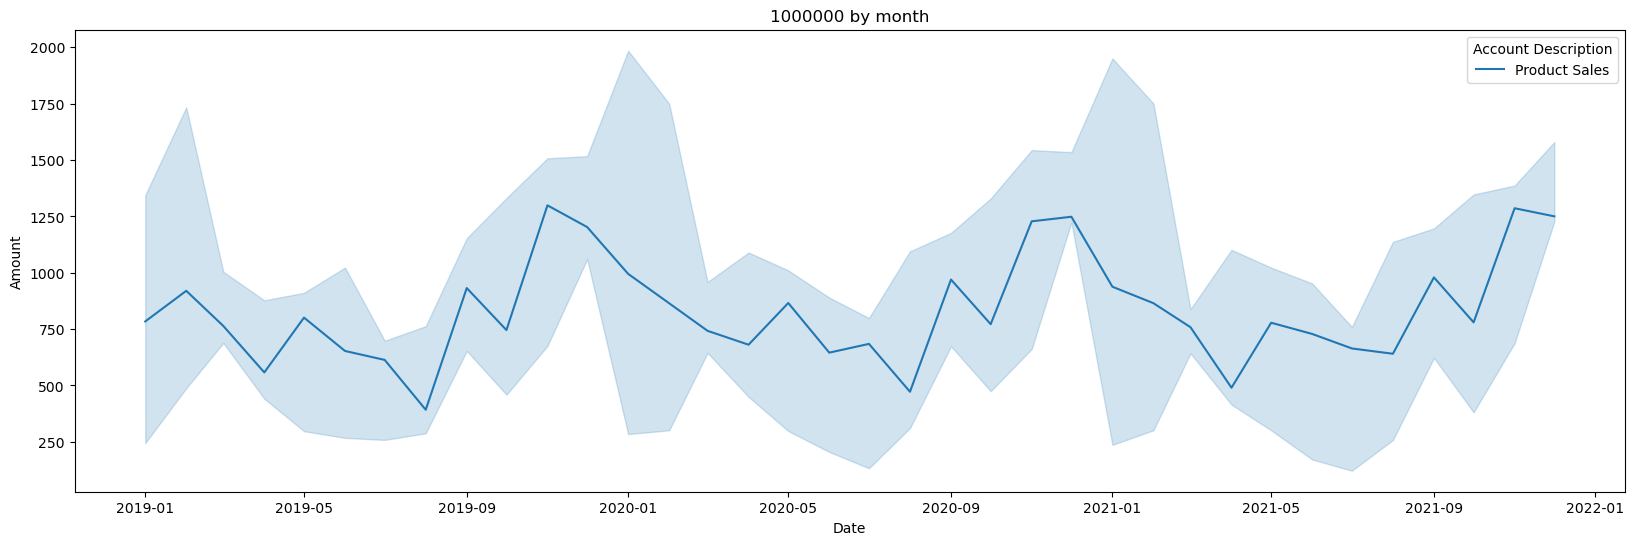

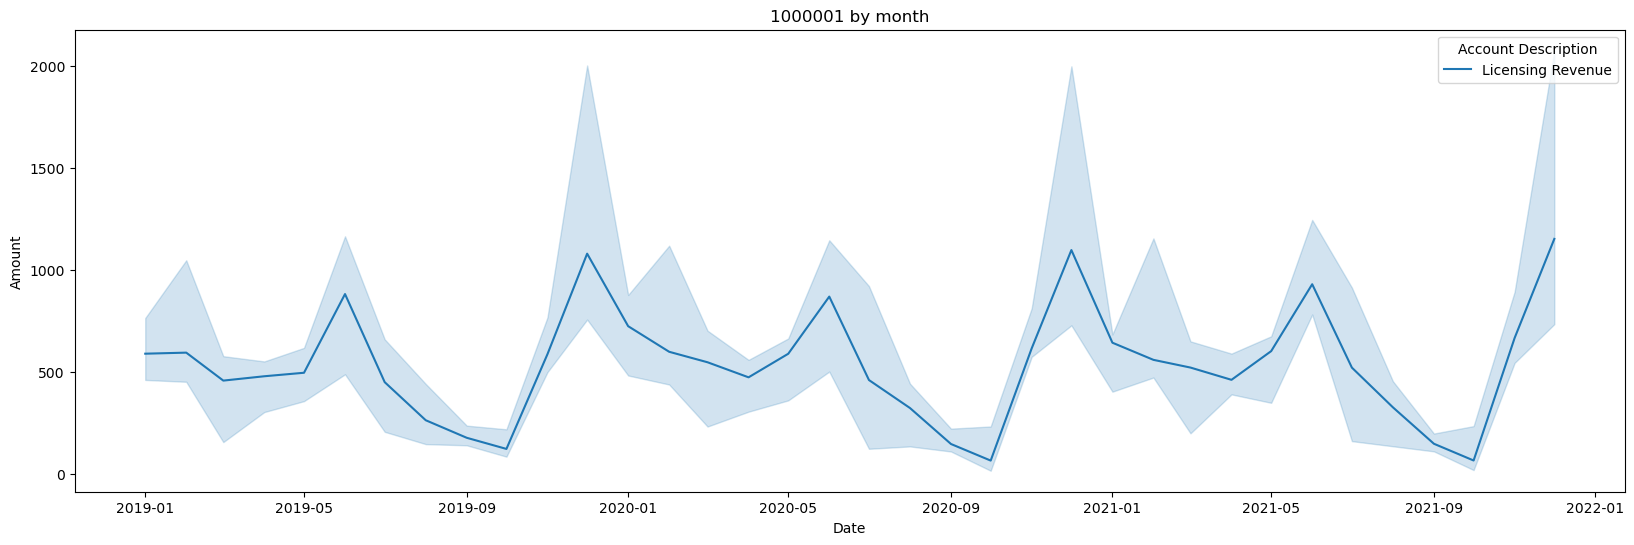

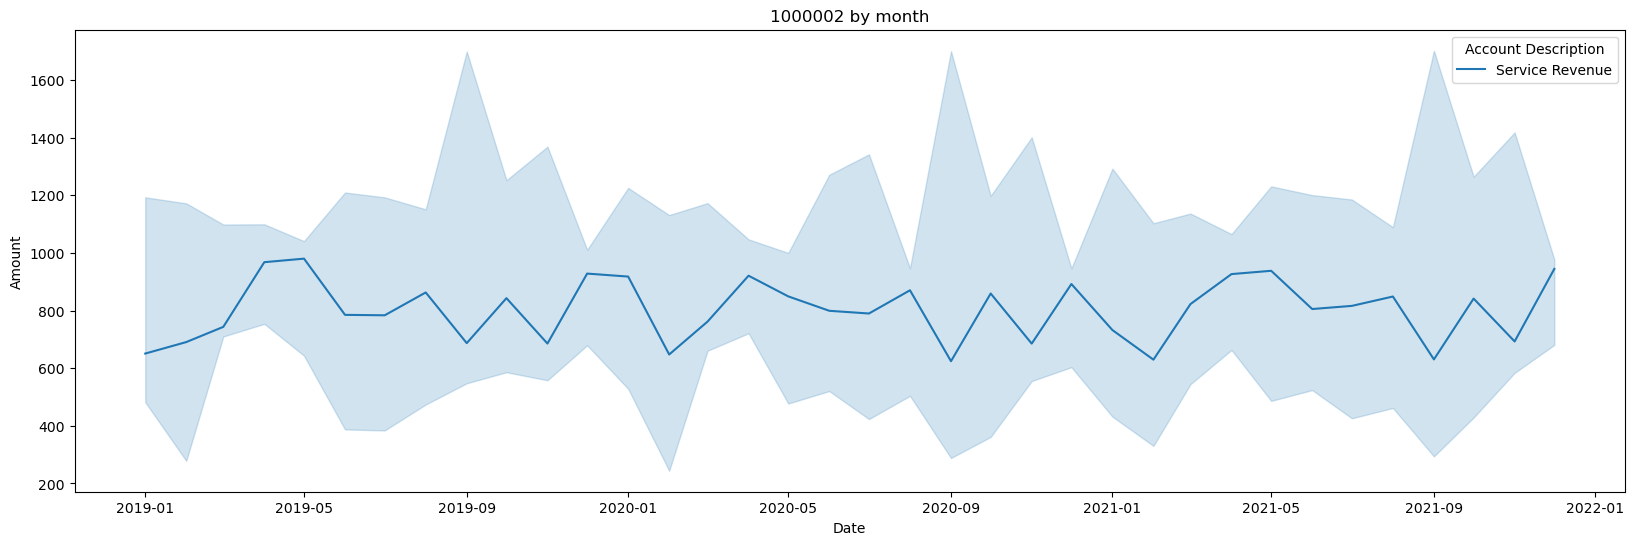

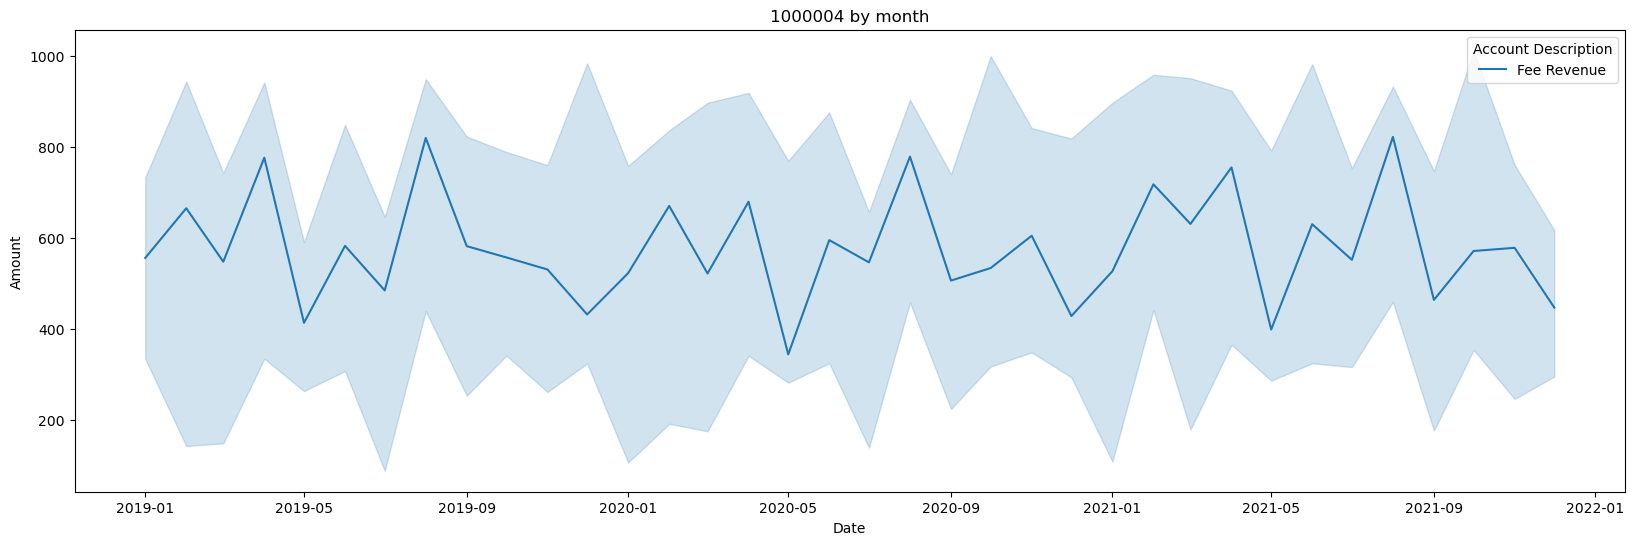

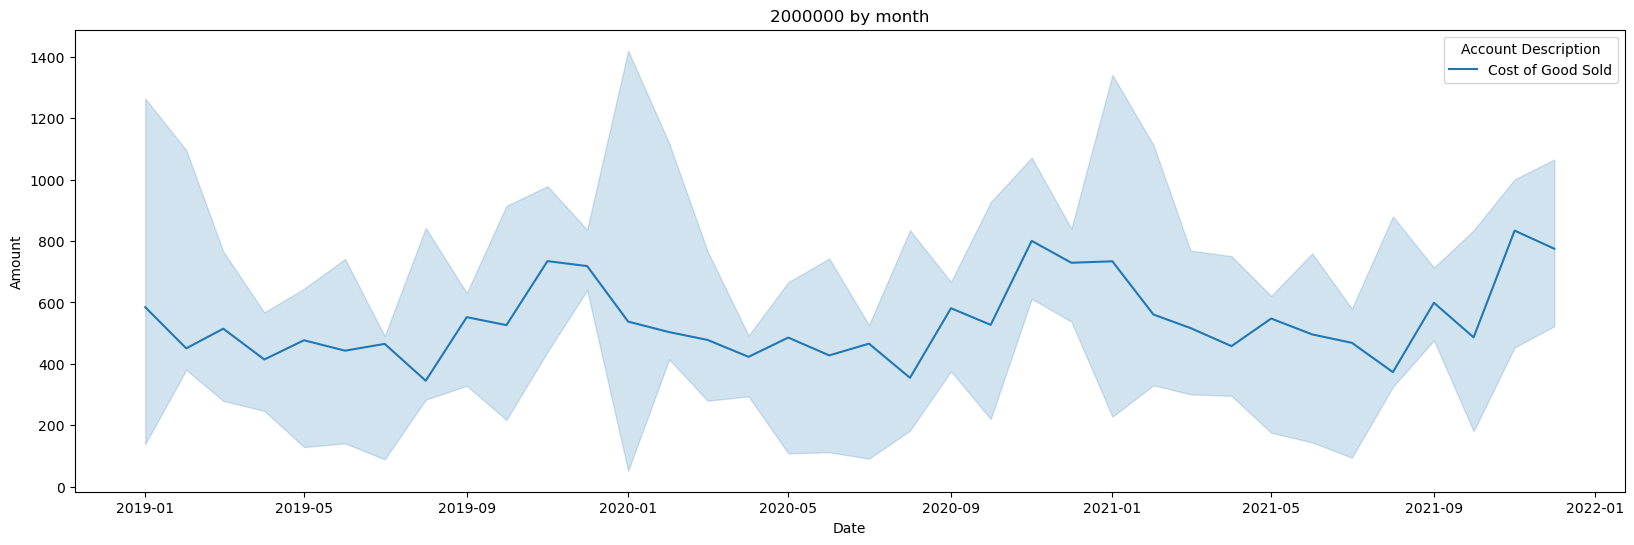

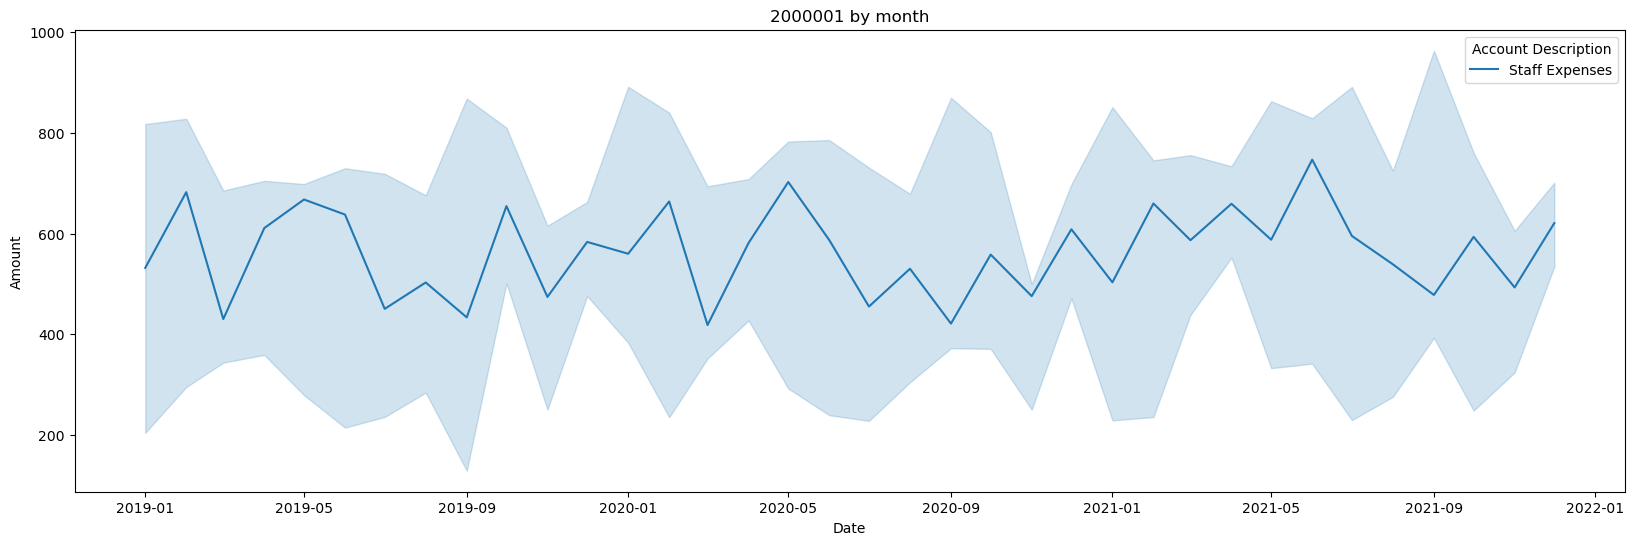

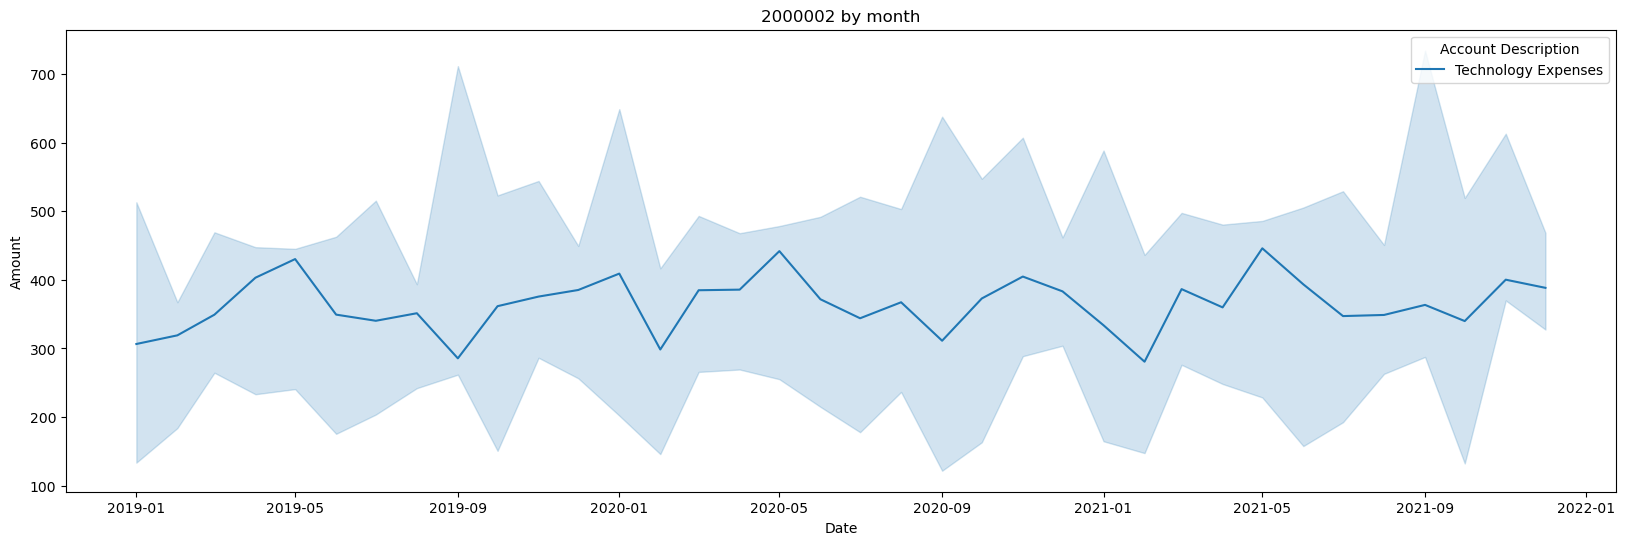

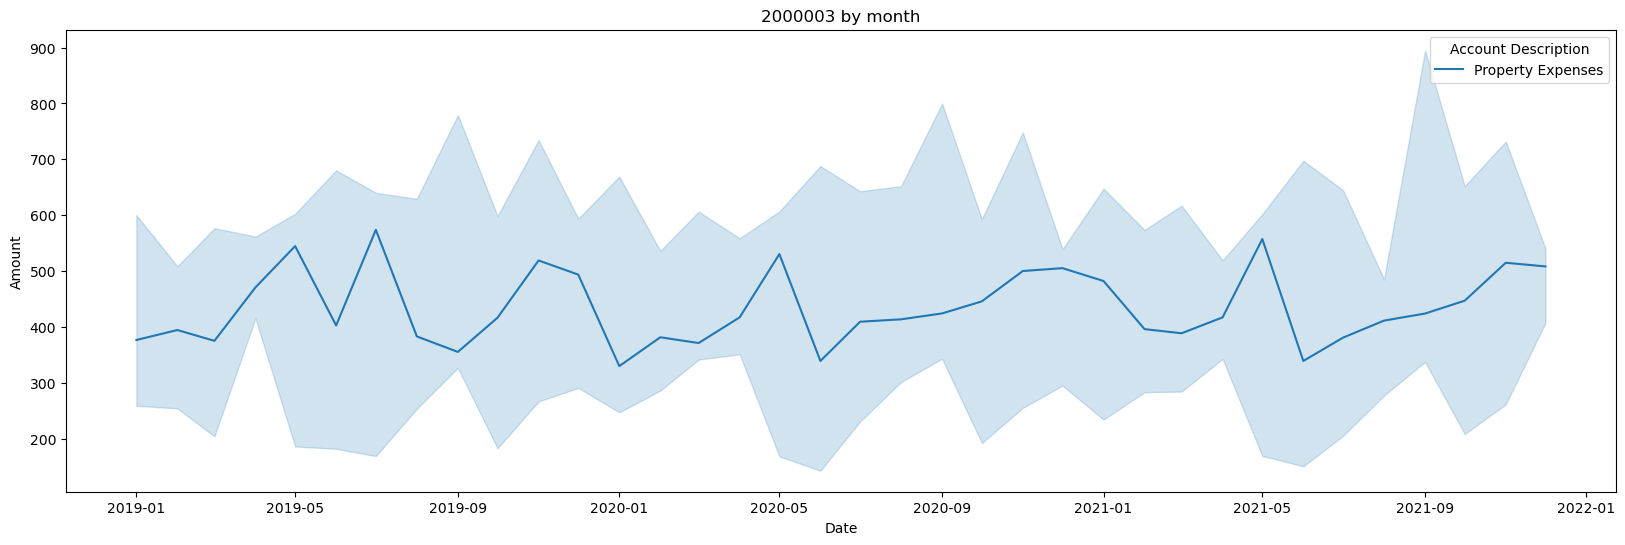

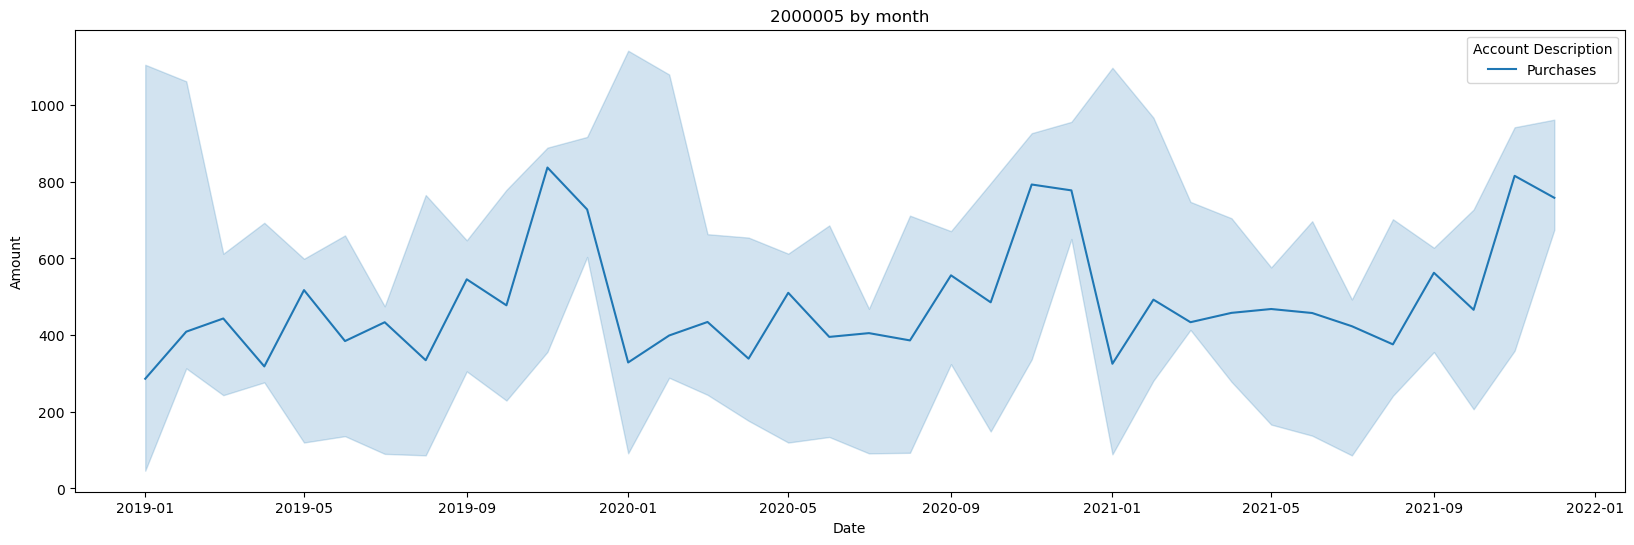

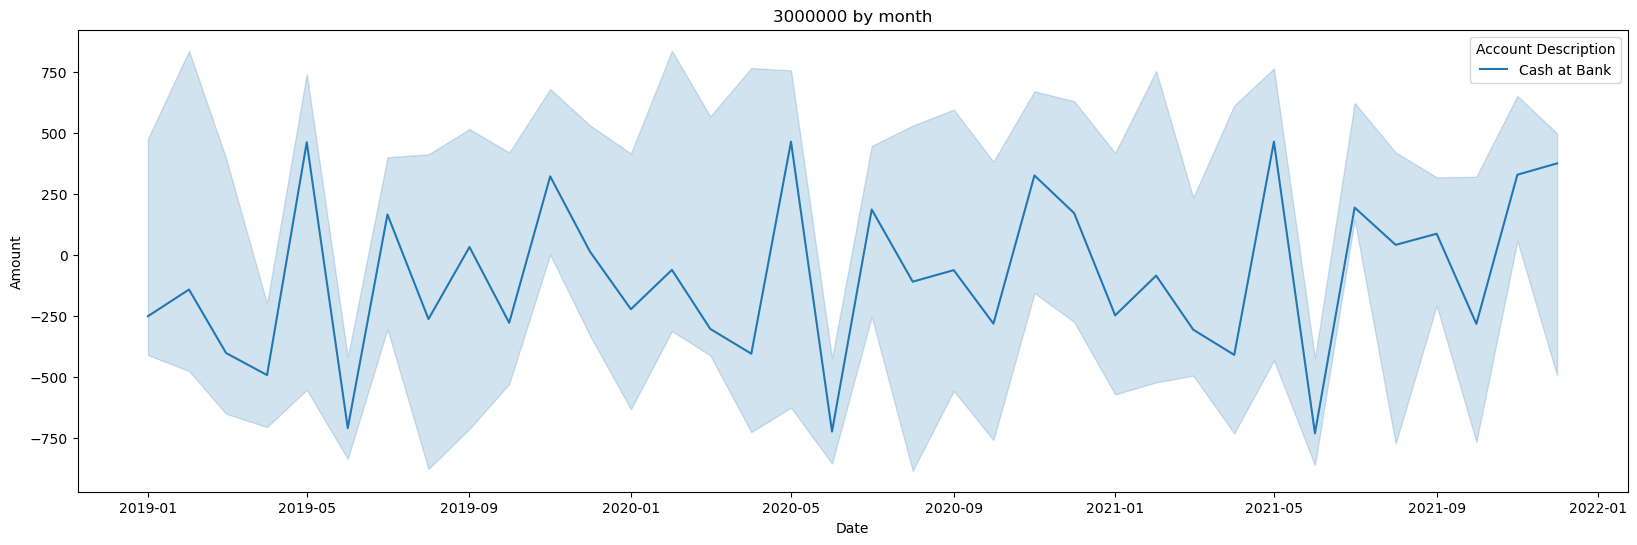

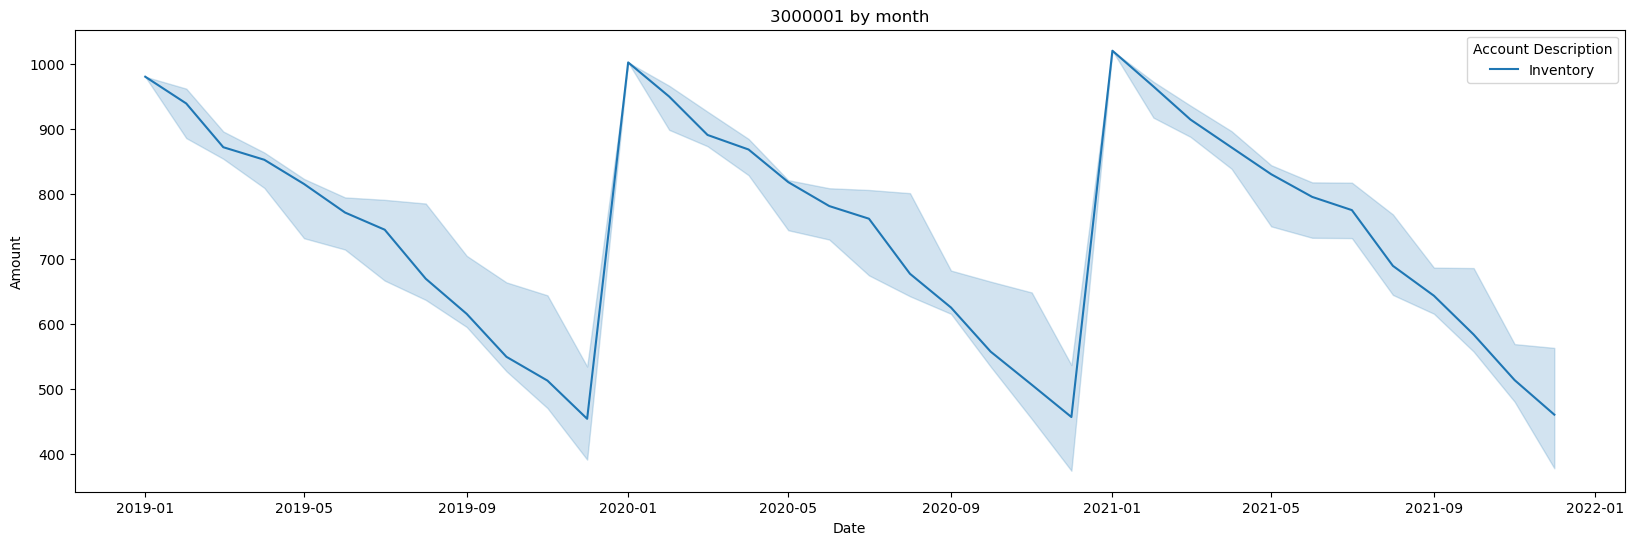

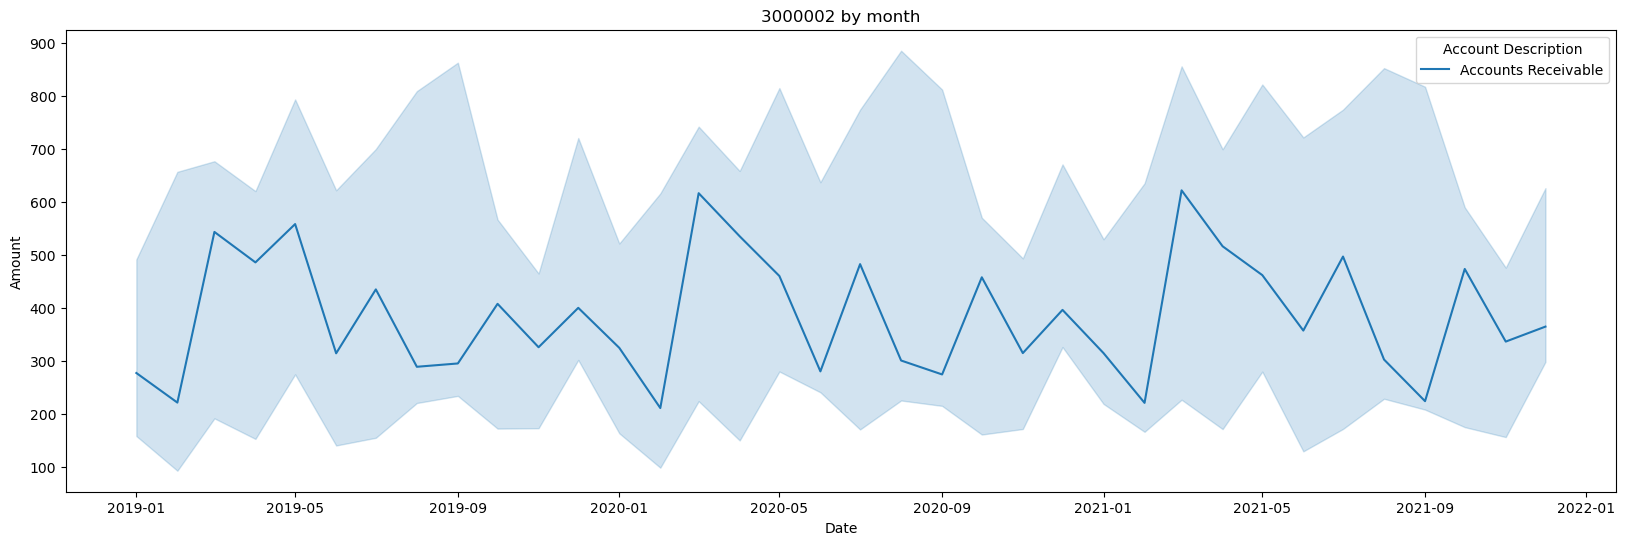

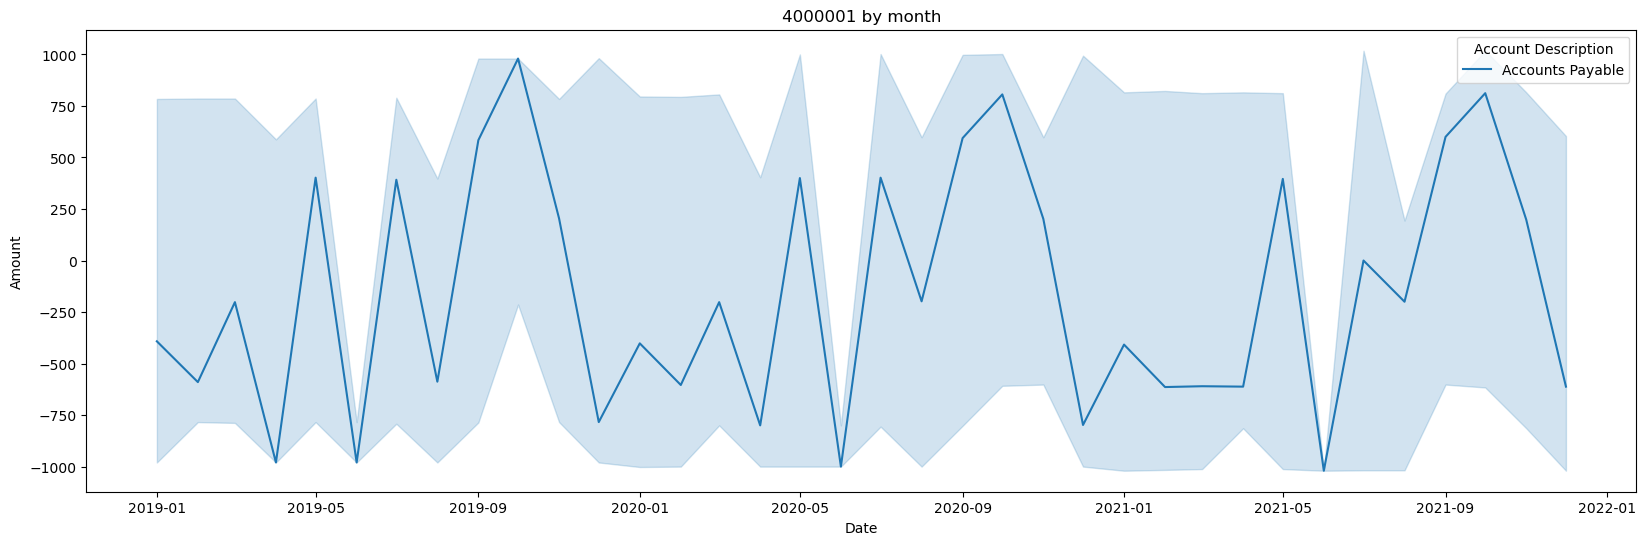

In [224]:
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date',y='Amount',estimator=np.median,hue='Account Description',data=df[df['Account']==account]).set_title('{} by month'.format(account))

In [225]:
# Remove it 
df=df[df['Account']!=3000001] #not has the same موسمية 

In [226]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000002, 4000001], dtype=int64)

convert fields to correct data type

In [183]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [233]:
df['Account']='ACC' + df['Account'].astype(str)
df['Year']=df['Year'].astype('object')

C:\Users\yluja\AppData\Local\Temp\ipykernel_33956\2875950389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Account']='ACC' + df['Account'].astype(str)
C:\Users\yluja\AppData\Local\Temp\ipykernel_33956\2875950389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Year'].astype('object')


In [234]:
df.dtypes

Year                           object
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [237]:
# will remove period ,day and date cols cuz we create them for analysis 
df.drop(columns=['Period','Day','Date'],inplace=True)

C:\Users\yluja\AppData\Local\Temp\ipykernel_33956\1650589882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Period','Day','Date'],inplace=True)


In [239]:
df

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328
...,...,...,...,...,...,...,...
4206,2021,Dec,CC302,ACC2000003,Property Expenses,Expense,540.060
4207,2021,Dec,CC302,ACC2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,ACC3000000,Cash at Bank,Asset,-282.056
4210,2021,Dec,CC302,ACC3000002,Accounts Receivable,Asset,1152.680


combine Account and account describtion on one col

In [243]:
len(df['Account'].unique())

12

In [244]:
len(df['Account Description'].unique())

12

In [245]:
df['AccountVal']=df['Account'] + df['Account Description']

C:\Users\yluja\AppData\Local\Temp\ipykernel_33956\3751211530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AccountVal']=df['Account'] + df['Account Description']


In [246]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,AccountVal
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,ACC1000000Product Sales
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,ACC1000001Licensing Revenue
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,ACC1000002Service Revenue
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,ACC1000004Fee Revenue
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,ACC2000000Cost of Good Sold


In [247]:
df.drop(columns=['Account','Account Description'],inplace=True)

C:\Users\yluja\AppData\Local\Temp\ipykernel_33956\1050860143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Account','Account Description'],inplace=True)


In [249]:
df.head()

,Year,Month,Cost Centre,Account Type,Amount,AccountVal
0,2019,Jan,CC100,Revenue,1344.051,ACC1000000Product Sales
1,2019,Jan,CC100,Revenue,480.968,ACC1000001Licensing Revenue
2,2019,Jan,CC100,Revenue,650.820,ACC1000002Service Revenue
3,2019,Jan,CC100,Revenue,339.360,ACC1000004Fee Revenue
4,2019,Jan,CC100,Expense,1125.328,ACC2000000Cost of Good Sold


One hot encoding 

In [251]:
df=pd.get_dummies(df)

In [254]:
df = df.astype(int)

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,AccountVal_ACC1000002Service Revenue,AccountVal_ACC1000004Fee Revenue,AccountVal_ACC2000000Cost of Good Sold,AccountVal_ACC2000001Staff Expenses,AccountVal_ACC2000002Technology Expenses,AccountVal_ACC2000003Property Expenses,AccountVal_ACC2000005Purchases,AccountVal_ACC3000000Cash at Bank,AccountVal_ACC3000002Accounts Receivable,AccountVal_ACC4000001Accounts Payable
0,1344,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,480,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,650,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,339,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,1125,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4206,540,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4207,698,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4208,-282,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4210,1152,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [255]:
df.dtypes

Amount                                      int32
Year_2019                                   int32
Year_2020                                   int32
Year_2021                                   int32
Month_Apr                                   int32
Month_Aug                                   int32
Month_Dec                                   int32
Month_Feb                                   int32
Month_Jan                                   int32
Month_Jul                                   int32
Month_Jun                                   int32
Month_Mar                                   int32
Month_May                                   int32
Month_Nov                                   int32
Month_Oct                                   int32
Month_Sep                                   int32
Cost Centre_CC100                           int32
Cost Centre_CC101                           int32
Cost Centre_CC102                           int32
Cost Centre_CC200                           int32


# Modelling

In [257]:
x =df.drop('Amount',axis=1)
y =df['Amount']

In [260]:
#to reduce variance
from sklearn.model_selection import train_test_split

In [268]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [269]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(2721, 40) (1167, 40) (2721,) (1167,)


import Dependencies

In [274]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso , ElasticNet
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

In [275]:
pipelines ={
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),    
}

In [300]:
#same keys of the pipline
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split': [2, 4, 6],
        'randomforestregressor__min_samples_leaf': [1, 2, 3]
    },
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge': {
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso': {
        'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet': {
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}


In [301]:
fit_models={}
for algo,pipeline in pipelines.items():
    print(pipeline)

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(random_state=1234))])
Pipeline(steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=1234))])
Pipeline(steps=[('ridge', Ridge(random_state=1234))])
Pipeline(steps=[('lasso', Lasso(random_state=1234))])
Pipeline(steps=[('elasticnet', ElasticNet(random_state=1234))])


In [302]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [303]:
fit_models={}
for algo,pipeline in pipelines.items():
    model = GridSearchCV(pipeline,hypergrid[algo],cv=10,n_jobs=-1)
    try:
        print('Starting training for {}'.format(algo))
        model.fit(x_train,y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf
rf has been successfully fit.
Starting training for gb
gb has been successfully fit.
Starting training for ridge
ridge has been successfully fit.
Starting training for lasso
lasso has been successfully fit.
Starting training for enet
enet has been successfully fit.


In [304]:
#make predictions
fit_models['rf'].predict(x_test)

array([460.34, 457.13, 494.85, ..., 540.44, 700.86, 482.31])

In [305]:
fit_models['ridge'].predict(x_test)

array([123.06757349, 399.00523942, 606.52369649, ..., 610.08251692,
       940.17259889, 894.88861446])

# Evaluation

to know the model that is performing the best 

In [309]:
from sklearn.metrics import r2_score,mean_absolute_error

In [315]:
for algo,model in fit_models.items():
    yhat = model.predict(x_test)
    print('{} scores - R2:{} MAE:{}'.format(algo,r2_score(y_test,yhat),mean_absolute_error(y_test,yhat)))

rf scores - R2:0.7852993365897031 MAE:150.42108826049702
gb scores - R2:0.4917600703528259 MAE:267.48158708533134
ridge scores - R2:0.3508433298779833 MAE:305.78347239342344
lasso scores - R2:0.35270087817878737 MAE:305.2160648039183
enet scores - R2:0.35162289454966433 MAE:305.5295162529475


In [318]:
best_model = fit_models['rf']